# Working with time series data

Some imports:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except:
    pass

pd.options.display.max_rows = 8

## Case study: air quality data of European monitoring stations (AirBase)

AirBase (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe. 

In [2]:
from IPython.display import HTML
HTML('<iframe src=http://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-8#tab-data-by-country width=900 height=350></iframe>')

I downloaded and preprocessed some of the data ([python-airbase](https://github.com/jorisvandenbossche/python-airbase)): `data/airbase_data.csv`. This file includes the hourly concentrations of NO2 for 4 different measurement stations:

- FR04037 (PARIS 13eme): urban background site at Square de Choisy
- FR04012 (Paris, Place Victor Basch): urban traffic site at Rue d'Alesia
- BETR802: urban traffic site in Antwerp, Belgium
- BETN029: rural background site in Houtem, Belgium

See http://www.eea.europa.eu/themes/air/interactive/no2

## Importing the data

Import the csv file:

In [3]:
!head -5 data/airbase_data.csv

,BETR801,BETN029,FR04037,FR04012
1998-01-01 00:00:00,-9999,16.0,-9999,-9999
1998-01-01 01:00:00,-9999,13.0,-9999,-9999
1998-01-01 02:00:00,-9999,12.0,-9999,-9999
1998-01-01 03:00:00,-9999,12.0,-9999,-9999


As you can see, the missing values are indicated by `-9999`. This can be recognized by `read_csv` by passing the `na_values` keyword:

In [9]:
data = pd.read_csv('data/airbase_data.csv', index_col=0, parse_dates=True, na_values=[-9999])

## Exploring the data

Some useful methods:

`head` and `tail`

In [10]:
data.head(3)

,BETR801,BETN029,FR04037,FR04012
1998-01-01 00:00:00,NaN,16,NaN,NaN
1998-01-01 01:00:00,NaN,13,NaN,NaN
1998-01-01 02:00:00,NaN,12,NaN,NaN


In [11]:
data.tail()

,BETR801,BETN029,FR04037,FR04012
2012-12-31 19:00:00,21.0,2.5,28,67
2012-12-31 20:00:00,16.5,2.0,16,47
2012-12-31 21:00:00,14.5,2.5,13,43
2012-12-31 22:00:00,16.5,3.5,14,42
2012-12-31 23:00:00,15.0,3.0,13,49


`info()`

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131265 entries, 1998-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 4 columns):
BETR801    113252 non-null float64
BETN029    119703 non-null float64
FR04037    120384 non-null float64
FR04012    119448 non-null float64
dtypes: float64(4)
memory usage: 5.0 MB


Getting some basic summary statistics about the data with `describe`:

In [13]:
data.describe()

,BETR801,BETN029,FR04037,FR04012
count,113252.000000,119703.000000,120384.000000,119448.000000
mean,47.049302,16.542171,40.040005,87.993261
std,21.733629,12.446040,23.024347,41.317684
min,1.000000,1.000000,0.000000,0.000000
25%,31.000000,7.000000,23.000000,61.000000
50%,45.000000,12.000000,37.000000,88.000000
75%,60.000000,23.000000,54.000000,115.000000
max,339.000000,105.000000,256.000000,358.000000


Quickly visualizing the data

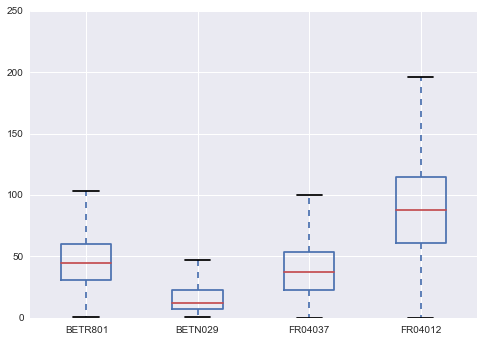

In [14]:
data.plot(kind='box', ylim=[0,250])

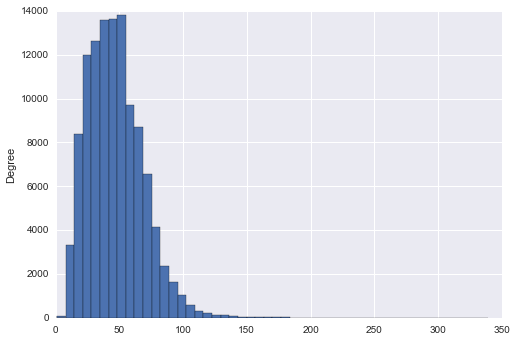

In [15]:
data['BETR801'].plot(kind='hist', bins=50)

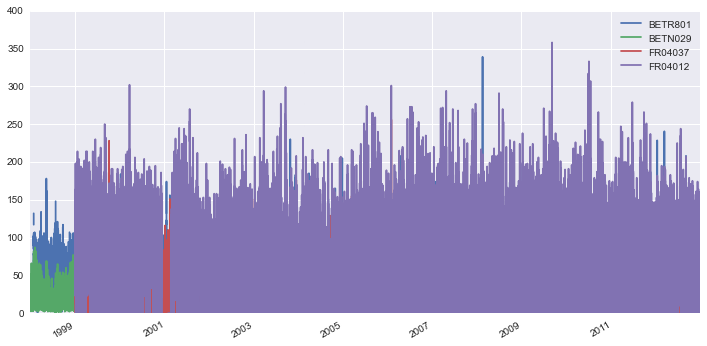

In [27]:
data.plot(figsize=(12,6))

This does not say too much ..

We can select part of the data (eg the latest 500 data points):

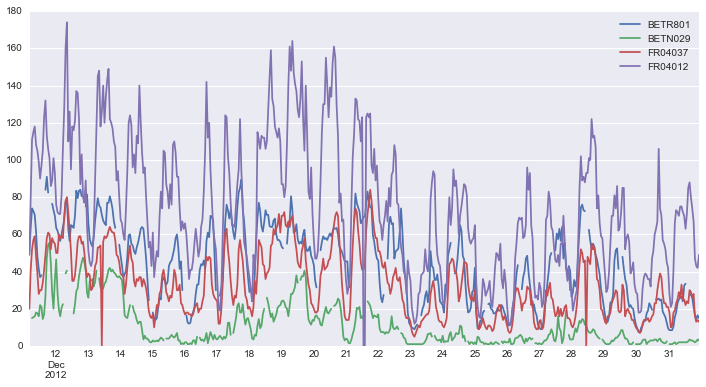

In [28]:
data[-500:].plot(figsize=(12,6))

Or we can use some more advanced time series features -> next section!

## Working with time series data

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [29]:
data.index

DatetimeIndex(['1998-01-01 00:00:00', '1998-01-01 01:00:00',
               '1998-01-01 02:00:00', '1998-01-01 03:00:00',
               '1998-01-01 04:00:00', '1998-01-01 05:00:00',
               '1998-01-01 06:00:00', '1998-01-01 07:00:00',
               '1998-01-01 08:00:00', '1998-01-01 09:00:00', 
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', length=131265, freq=None, tz=None)

Indexing a time series works with strings:

In [30]:
data.index[0]

Timestamp('1998-01-01 00:00:00')

In [31]:
data["2010-01-01 09:00": "2010-01-01 12:00"]

,BETR801,BETN029,FR04037,FR04012
2010-01-01 09:00:00,17,7,19,41
2010-01-01 10:00:00,18,5,21,48
2010-01-01 11:00:00,17,4,23,63
2010-01-01 12:00:00,18,4,22,57


A nice feature is **"partial string" indexing**, where we can do implicit slicing by providing a partial datetime string.

E.g. all data of 2012:

In [32]:
data['2012']

,BETR801,BETN029,FR04037,FR04012
2012-01-01 00:00:00,21.0,1.0,17,56
2012-01-01 01:00:00,18.0,1.0,16,50
2012-01-01 02:00:00,20.0,1.0,14,46
2012-01-01 03:00:00,16.0,1.0,17,47
...,...,...,...,...
2012-12-31 20:00:00,16.5,2.0,16,47
2012-12-31 21:00:00,14.5,2.5,13,43
2012-12-31 22:00:00,16.5,3.5,14,42
2012-12-31 23:00:00,15.0,3.0,13,49


Normally you would expect this to access a column named '2012', but as for a DatetimeIndex, pandas also tries to interprete it as a datetime slice.

Or all data of January up to March 2012:

In [33]:
data['2012-01':'2012-03']

,BETR801,BETN029,FR04037,FR04012
2012-01-01 00:00:00,21,1,17,56
2012-01-01 01:00:00,18,1,16,50
2012-01-01 02:00:00,20,1,14,46
2012-01-01 03:00:00,16,1,17,47
...,...,...,...,...
2012-03-31 20:00:00,38,6,19,46
2012-03-31 21:00:00,36,8,17,56
2012-03-31 22:00:00,34,8,18,59
2012-03-31 23:00:00,38,8,24,54


Time and date components can be accessed from the index:

In [34]:
data.index.hour

array([ 0,  1,  2, ..., 21, 22, 23])

In [37]:
data.index.weekday

array([3, 3, 3, ..., 0, 0, 0])

<div class="alert alert-success">
    <b>EXERCISE</b>: select all data starting from 1999
</div>

In [38]:
data = data['1999':]

<div class="alert alert-success">
    <b>EXERCISE</b>: select all data in January for all different years
</div>

In [39]:
data[data.index.month == 1]

,BETR801,BETN029,FR04037,FR04012
1999-01-01 00:00:00,27.0,13.0,68,105
1999-01-01 01:00:00,33.0,15.0,70,116
1999-01-01 02:00:00,24.0,16.0,72,114
1999-01-01 03:00:00,26.0,18.0,72,91
...,...,...,...,...
2012-01-31 20:00:00,53.5,41.0,61,79
2012-01-31 21:00:00,50.0,36.0,60,79
2012-01-31 22:00:00,45.0,33.0,58,79
2012-01-31 23:00:00,41.0,31.5,51,67


<div class="alert alert-success">
    <b>EXERCISE</b>: select all data in January, February and March for all different years
</div>

In [40]:
data['months'] = data.index.month
data[data['months'].isin([1, 2, 3])]

,BETR801,BETN029,FR04037,FR04012,months
1999-01-01 00:00:00,27,13,68,105,1
1999-01-01 01:00:00,33,15,70,116,1
1999-01-01 02:00:00,24,16,72,114,1
1999-01-01 03:00:00,26,18,72,91,1
...,...,...,...,...,...
2012-03-31 20:00:00,38,6,19,46,3
2012-03-31 21:00:00,36,8,17,56,3
2012-03-31 22:00:00,34,8,18,59,3
2012-03-31 23:00:00,38,8,24,54,3


<div class="alert alert-success">
    <b>EXERCISE</b>: select all 'daytime' data (between 8h and 20h) for all days
</div>

In [42]:
data[(data.index.hour >= 8) & (data.index.hour <= 20)]

,BETR801,BETN029,FR04037,FR04012,months
1999-01-01 08:00:00,28.0,20.0,65,70,1
1999-01-01 09:00:00,29.0,17.0,66,70,1
1999-01-01 10:00:00,36.0,15.0,58,79,1
1999-01-01 11:00:00,35.0,15.0,42,68,1
...,...,...,...,...,...
2012-12-31 17:00:00,27.5,3.0,29,80,12
2012-12-31 18:00:00,26.0,3.0,26,74,12
2012-12-31 19:00:00,21.0,2.5,28,67,12
2012-12-31 20:00:00,16.5,2.0,16,47,12


In [43]:
data.between_time('08:00', '20:00')

,BETR801,BETN029,FR04037,FR04012,months
1999-01-01 08:00:00,28.0,20.0,65,70,1
1999-01-01 09:00:00,29.0,17.0,66,70,1
1999-01-01 10:00:00,36.0,15.0,58,79,1
1999-01-01 11:00:00,35.0,15.0,42,68,1
...,...,...,...,...,...
2012-12-31 17:00:00,27.5,3.0,29,80,12
2012-12-31 18:00:00,26.0,3.0,26,74,12
2012-12-31 19:00:00,21.0,2.5,28,67,12
2012-12-31 20:00:00,16.5,2.0,16,47,12


## The power of pandas: `resample`

A very powerfull method is **`resample`: converting the frequency of the time series** (e.g. from hourly to daily data).

The time series has a frequency of 1 hour. I want to change this to daily:

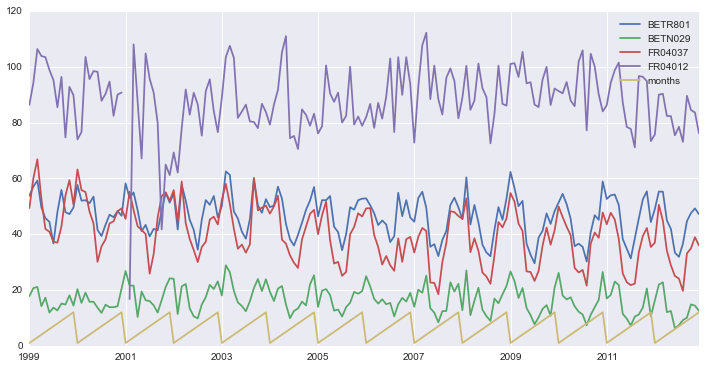

In [45]:
data.resample('M').plot(figsize=(12,6))

In [47]:
data.resample('A').head()

,BETR801,BETN029,FR04037,FR04012,months
1999-12-31,49.764002,15.825255,49.293037,93.919749,6.526027
2000-12-31,48.154520,15.806980,46.315915,90.201969,6.513661
2001-12-31,48.045962,18.334571,44.819292,74.797280,6.526027
2002-12-31,47.876558,17.548946,41.695542,82.226056,6.526027
2003-12-31,50.475548,19.800254,45.923288,88.576142,6.526027


By default, `resample` takes the mean as aggregation function, but other methods can also be specified:

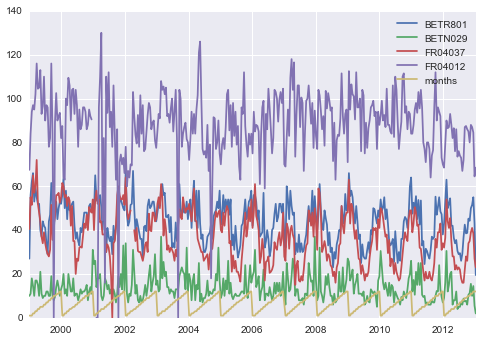

In [49]:
data.resample('2W', how='median').plot()

The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases  
These strings can also be combined with numbers, eg `'10D'`.

Further exploring the data:

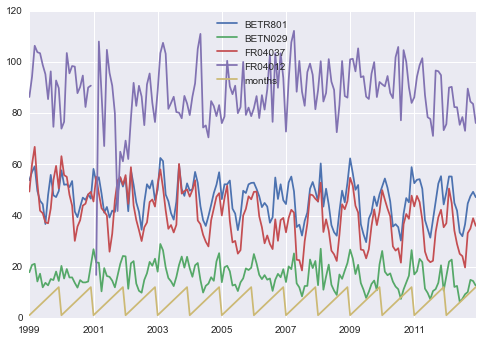

In [50]:
data.resample('M').plot() # 'A'

In [ ]:
# data['2012'].resample('D').plot()

<div class="alert alert-success">
    <b>QUESTION</b>: plot the monthly mean and median concentration of the 'FR04037' station for the years 2009-2012
</div>

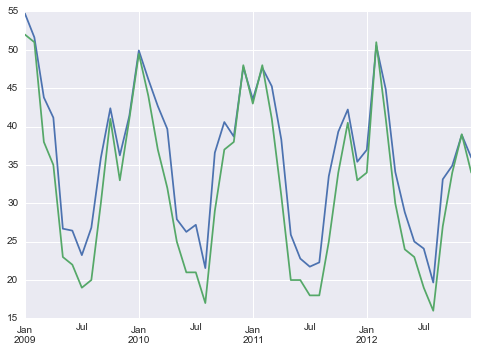

In [53]:
data.loc['2009':'2012', 'FR04037'].resample('M', 'mean').plot()
data.loc['2009':'2012', 'FR04037'].resample('M', 'median').plot()

In [55]:
data.loc['2009':'2012', 'FR04037'].resample('M', ['mean', 'median'])


,mean,median
2009-01-31,54.758065,52
2009-02-28,51.630952,51
2009-03-31,43.799731,38
2009-04-30,41.165278,35
...,...,...
2012-09-30,33.127778,27
2012-10-31,34.909946,34
2012-11-30,38.927778,39
2012-12-31,35.959677,34


<div class="alert alert-success">
    <b>QUESTION</b>: plot the monthly mininum and maximum daily concentration of the 'BETR801' station
</div>

In [56]:
daily = data['BETR801'].resample('D')

In [57]:
daily

1999-01-01    35.500000
1999-01-02    26.681818
1999-01-03    19.636364
1999-01-04    35.294118
                ...    
2012-12-28    49.090909
2012-12-29    28.568182
2012-12-30    16.954545
2012-12-31    19.750000
Freq: D, Name: BETR801, dtype: float64

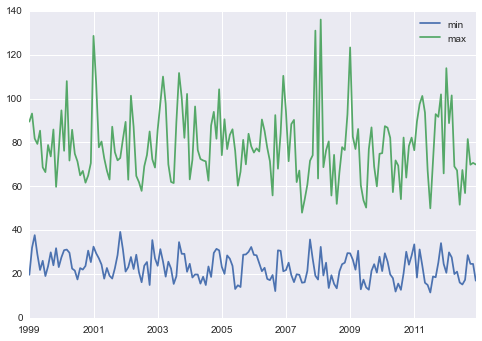

In [59]:
daily.resample('M', ['min', 'max']).plot()


<div class="alert alert-success">
    <b>QUESTION</b>: make a bar plot of the mean of the stations in year of 2012
</div>

In [61]:
data = data.drop('months', axis=1)

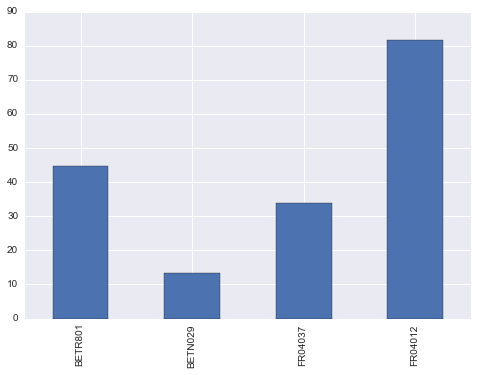

In [64]:
data['2012'].mean().plot(kind='bar')

<div class="alert alert-success">
    <b>QUESTION</b>: The evolution of the yearly averages with, and the overall mean of all stations?
</div>

In [70]:
data.mean(axis=1)

1999-01-01 00:00:00    53.250
1999-01-01 01:00:00    58.500
1999-01-01 02:00:00    56.500
1999-01-01 03:00:00    51.750
                        ...  
2012-12-31 20:00:00    20.375
2012-12-31 21:00:00    18.250
2012-12-31 22:00:00    19.000
2012-12-31 23:00:00    20.000
dtype: float64

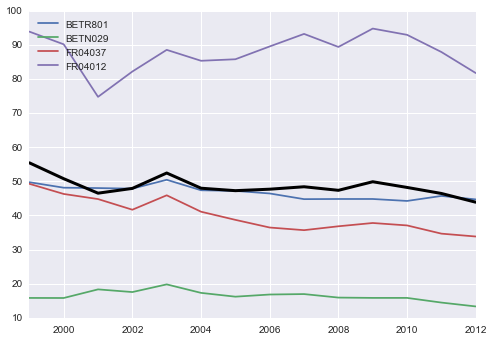

In [74]:
data.resample('A').plot()
data.mean(axis=1).resample('A').plot(color='k', linewidth=3)

## Combination with groupby

`resample` can actually be seen as a specific kind of `groupby`. E.g. taking annual means with `data.resample('A', 'mean')` is equivalent to `data.groupby(data.index.year).mean()` (only the result of `resample` still has a DatetimeIndex).



In [77]:
data.groupby(data.index.year).mean().index

Int64Index([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012],
           dtype='int64')

But, `groupby` is more flexible and can also do resamples that do not result in a new continuous time series, e.g. by grouping by the hour of the day to get the diurnal cycle.

<div class="alert alert-success">
    <b>QUESTION</b>: how does the *typical monthly profile* look like for the different stations?
</div>

1\. add a column to the dataframe that indicates the month (integer value of 1 to 12):

In [79]:
data['month'] = data.index.month

In [80]:
data

,BETR801,BETN029,FR04037,FR04012,month
1999-01-01 00:00:00,27.0,13.0,68,105,1
1999-01-01 01:00:00,33.0,15.0,70,116,1
1999-01-01 02:00:00,24.0,16.0,72,114,1
1999-01-01 03:00:00,26.0,18.0,72,91,1
...,...,...,...,...,...
2012-12-31 20:00:00,16.5,2.0,16,47,12
2012-12-31 21:00:00,14.5,2.5,13,43,12
2012-12-31 22:00:00,16.5,3.5,14,42,12
2012-12-31 23:00:00,15.0,3.0,13,49,12


2\. Now, we can calculate the mean of each month over the different years:

In [81]:
data.groupby('month').mean()

,BETR801,BETN029,FR04037,FR04012
month,,,,
1,51.955189,19.832429,47.634409,82.472813
2,53.721187,20.238004,50.564499,83.973207
3,53.737157,19.741470,47.862715,96.272138
4,49.445248,17.865095,40.943117,95.962862
...,...,...,...,...
9,47.193898,14.292315,39.706019,93.000316
10,48.649218,17.007418,44.010934,86.297836
11,50.186465,17.900151,45.564683,87.173878
12,50.194588,20.200031,45.262243,81.817977


3\. plot the typical monthly profile of the different stations:

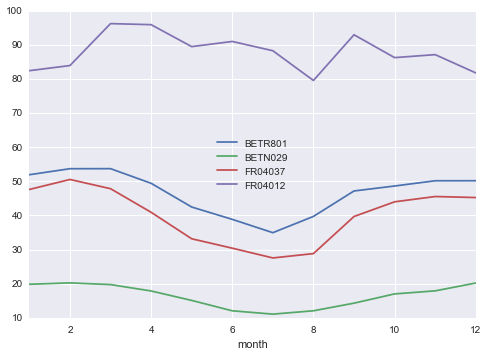

In [82]:
data.groupby('month').mean().plot()

<div class="alert alert-success">
    <b>QUESTION</b>: plot the weekly 95% percentiles of the concentration in 'BETR801' and 'BETN029' for 2011
</div>


<div class="alert alert-success">
    <b>QUESTION</b>: The typical diurnal profile for the different stations?
</div>

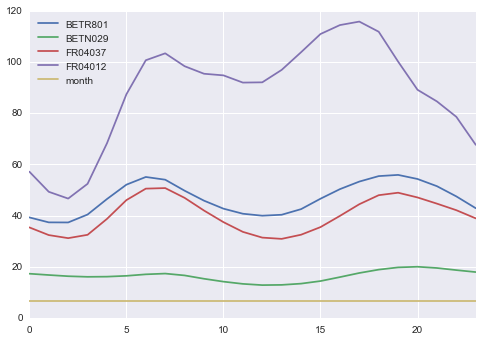

In [84]:
data.groupby(data.index.hour).mean().plot()

<div class="alert alert-success">
    <b>QUESTION</b>: What is the difference in the typical diurnal profile between week and weekend days?
</div>

In [88]:
data['weekday']  = data.index.weekday

In [90]:
data['weekend'] = data['weekday'].isin([5,6])

In [94]:
result = data.groupby([data['weekend'], data.index.hour]).mean()

In [95]:
result

BETR801    BETN029    FR04037    FR04012     month  weekday
weekend                                                                  
False   0   38.693423  17.415094  34.439398  52.094663  6.523823      2.0
        1   37.128589  16.985991  31.585121  44.721629  6.523823      2.0
        2   37.837973  16.530217  30.865143  43.518539  6.523823      2.0
        3   42.446300  16.362120  32.963500  51.942135  6.523823      2.0
...               ...        ...        ...        ...       ...      ...
True    20  49.222136  17.410873  43.909601  85.618913  6.519152      5.5
        21  47.222826  17.185377  42.119832  82.027523  6.519152      5.5
        22  43.975505  16.391722  40.324457  77.357092  6.519152      5.5
        23  39.985948  15.682422  38.213735  69.081157  6.519152      5.5

[48 rows x 6 columns]

In [99]:
FR04012 = result['FR04012']

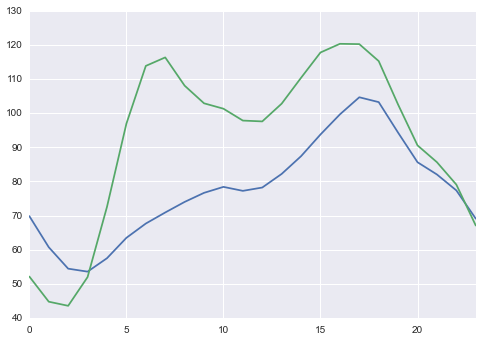

In [100]:
FR04012.loc[True].plot()
FR04012.loc[False].plot()

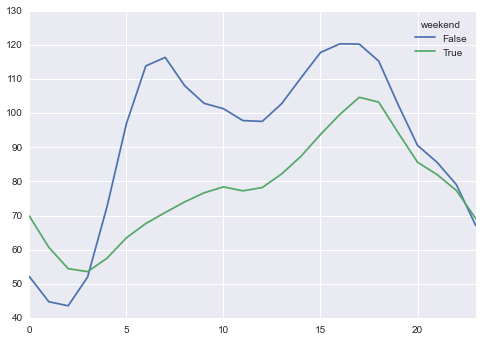

In [103]:
FR04012.unstack(0).plot()

<div class="alert alert-success">
    <b>QUESTION</b>: What are the number of exceedances of hourly values above the European limit 200 µg/m3 ?
</div>

In [105]:
data = data.drop(['month', 'weekday', 'weekend'], axis=1)

In [108]:
exceedances = data > 200

In [111]:
exceedances.groupby(exceedances.index.year).sum()

,BETR801,BETN029,FR04037,FR04012
1999,0,0,3,39
2000,0,0,0,17
2001,0,0,0,88
2002,0,0,0,12
...,...,...,...,...
2009,0,0,0,58
2010,0,0,0,104
2011,1,0,0,62
2012,6,0,0,13


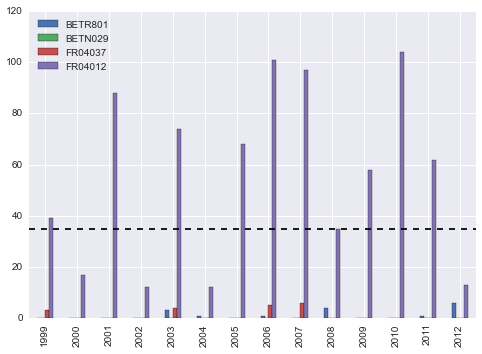

In [116]:
ax = exceedances.groupby(exceedances.index.year).sum().plot(kind='bar')
ax.axhline(35, linestyle='--', color='k')

<div class="alert alert-success">
    <b>QUESTION</b>: And are there exceedances of the yearly limit value of 40 µg/m3 since 200 ?
</div>

<div class="alert alert-success">
    <b>QUESTION</b>: Visualize the typical week profile for the different stations as boxplots.
</div>

Tip: the boxplot method of a DataFrame expects the data for the different boxes in different columns)

<div class="alert alert-success">
    <b>QUESTION</b>: Calculate the correlation between the different stations
</div>


In [117]:
data.corr()

,BETR801,BETN029,FR04037,FR04012
BETR801,1.000000,0.472954,0.561676,0.394446
BETN029,0.472954,1.000000,0.401864,0.186997
FR04037,0.561676,0.401864,1.000000,0.433466
FR04012,0.394446,0.186997,0.433466,1.000000


/home/joris/miniconda/envs/python3/lib/python3.4/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/home/joris/miniconda/envs/python3/lib/python3.4/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


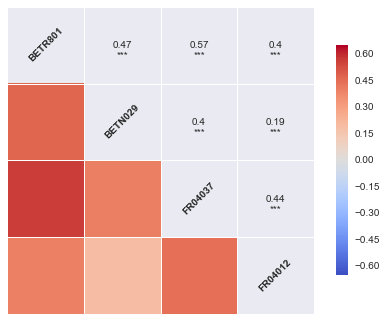

In [119]:
seaborn.corrplot(data.dropna())